# Exercize number 2

## Group nickname: MuonGang

### Participants:
    - Valente Alessandro 1234429
    - Ardino Rocco 1231629 
    - Paccagnella Andrea 1211171

# Index <a class="anchor" id="Ex2.i"></a>

1. [Data augmentation and results improvement](#Ex2.1.)<br>
2. [Grid search for hyperparameters tuning](#Ex2.2.)<br>
3. [Data rescaling experiments](#Ex2.3.)<br>
4. [Appendix](#Ex2.4.)<br>

## 1. - Data augmentation and results improvement <a class="anchor" id="Ex2.1."></a>
* [Index](#Ex2.i)

In this section we used the same model as the one saw in the lecture and we augmented the data by spatial traslation to see if there is an improvement 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#import keras, sklearn
import sklearn
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
import tensorflow.keras
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Firstly we import the data from file and set the seed for tensorflow and numpy

In [2]:
seed=1234429
np.random.seed(seed) 
tf.random.set_seed(seed)

train_percentage=0.8
datafile='secretkeys_exe-b.csv'
dataset=np.loadtxt(datafile, delimiter=',', dtype=int)

N=len(dataset) #data dimension
D=9 #digits
L=len(str(dataset[0,0]))
LD=L*D

print(dataset)
print(dataset.shape)

[[4573627       0]
 [9393629       0]
 [9334246       0]
 ...
 [1141143       0]
 [6919239       0]
 [6938298       0]]
(3000, 2)


Now here we define the expand function as seen in the lecture and then train the model seen in the lecture

In [3]:
def expand(S):
    if(len(str(S))!=L):
        print('dimensional error')
        return []
    x=[0]*LD
    p=10**(L-1)
    j=0
    while j<L:
        q=int(S/p)
        x[j*D+(q-1)]=1
        j+=1
        S=S-q*p
        p=int(p/10)
    return x

print("9999999", expand(9999999))

9999999 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [4]:
X_train=np.array([expand(x) for x in dataset[:int(N*train_percentage),0]])
X_test=np.array([expand(x) for x in dataset[int(N*train_percentage):,0]])
Y_train=np.array([y for y in dataset[:int(N*train_percentage),-1]])
Y_test=np.array([y for y in dataset[int(N*train_percentage):,-1]])

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
print(X_train)
# Dimensions of arrays are ok

(2400, 63) (600, 63)
(2400,) (600,)
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [5]:
model = Sequential ()
model.add(Dense(LD, input_shape=(LD,), activation='relu'))
model.add(Dense(max(10, int(LD/2)), activation='relu'))
model.add(Dense(max(6, int(LD/4)), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 63)                4032      
_________________________________________________________________
dense_1 (Dense)              (None, 31)                1984      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                480       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 6,512
Trainable params: 6,512
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
predictor=model.fit(X_train, Y_train, epochs=80, batch_size=20, validation_data=(X_test,Y_test), verbose=0)
print("Training ended")

Training ended


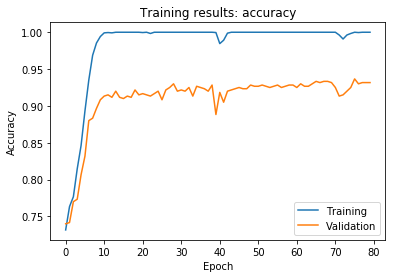

In [8]:
plt.plot(predictor.history['accuracy'],     label='Training'  )
plt.plot(predictor.history['val_accuracy'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training results: accuracy")
plt.legend()
plt.show()

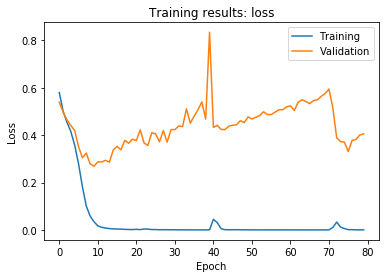

600/600 [==============================] - 0s 302us/sample - loss: 0.4054 - accuracy: 0.9317

Test loss: 0.4053693209107344
Test accuracy: 0.9316667


In [9]:
plt.plot(predictor.history['loss']    , label='Training'  )
plt.plot(predictor.history['val_loss'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training results: loss")
plt.legend()
plt.show()

score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

This was what we saw in class

### Now we can perform the data augmentation

Firstly we define the augment fuction which as the name says given one data from the dataset returns its augmentation (inclused the label)

In [10]:
def augment(data):
    x=data[0]
    y=data[1]
    aug=[]
    for i in range(len(str(x))):
        aug.append([int(str(x)[i:]+str(x)[:i]),y])
    return np.array(aug)

print(augment([12345,1]))

[[12345     1]
 [23451     1]
 [34512     1]
 [45123     1]
 [51234     1]]


In the cell below is shown the result of the augmentation of the first 2 points in the dataset

In [11]:
data_try=dataset[0:2]
print(data_try)
data_try_augmented=(np.array([augment(x)for x in data_try]))
data_try_augmented=np.reshape(data_try_augmented,(data_try_augmented.shape[0]*data_try_augmented.shape[1], data_try_augmented.shape[2]), order='C')
print(data_try_augmented, data_try_augmented.shape)

[[4573627       0]
 [9393629       0]]
[[4573627       0]
 [5736274       0]
 [7362745       0]
 [3627457       0]
 [6274573       0]
 [2745736       0]
 [7457362       0]
 [9393629       0]
 [3936299       0]
 [9362993       0]
 [3629939       0]
 [6299393       0]
 [2993936       0]
 [9939362       0]] (14, 2)


Now we augment the whole data set and then we expand it as done before, after that we reshuffle the data and redefine the N,L,D values

In [12]:
data_augmented=(np.array([augment(x)for x in dataset]))
data_augmented=np.reshape(data_augmented,(data_augmented.shape[0]*data_augmented.shape[1], data_augmented.shape[2]), order='C')
print(data_augmented.shape)

(21000, 2)


In [13]:
N=data_augmented.shape[0]

X_train_augmented=np.array([expand(x) for x in data_augmented[:int(N*train_percentage),0]])
X_test_augmented=np.array([expand(x)  for x in data_augmented[int(N*train_percentage):,0]])
Y_train_augmented=np.array([y for y in data_augmented[:int(N*train_percentage),-1]])
Y_test_augmented=np.array([y for y in data_augmented[int(N*train_percentage):,-1]])

print(X_train_augmented.shape, X_test_augmented.shape)
print(Y_train_augmented.shape, Y_test_augmented.shape)
print(X_train)

(16800, 63) (4200, 63)
(16800,) (4200,)
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [14]:
permutation_train = np.random.permutation(X_train_augmented.shape[0])
permutation_test = np.random.permutation(X_test_augmented.shape[0])

X_train_augmented = X_train_augmented[permutation_train]
Y_train_augmented = Y_train_augmented[permutation_train]
X_test_augmented = X_test_augmented[permutation_test]
Y_test_augmented = Y_test_augmented[permutation_test]

In [15]:
N=len(data_augmented) #data dimension
D=9 #digits
L=len(str(data_augmented[0,0]))
LD=L*D

print(N, L, LD)

21000 7 63


At last we can define the same model as before and try to train it on the new data

In [16]:
#same model
model_augmented = Sequential ()
model_augmented.add(Dense(LD, input_shape=(LD,), activation='relu'))
model_augmented.add(Dense(max(10, int(LD/2)), activation='relu'))
model_augmented.add(Dense(max(6, int(LD/4)), activation='relu'))
model_augmented.add(Dropout(0.2))
model_augmented.add(Dense(1, activation='sigmoid'))
print(model_augmented.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 63)                4032      
_________________________________________________________________
dense_5 (Dense)              (None, 31)                1984      
_________________________________________________________________
dense_6 (Dense)              (None, 15)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 16        
Total params: 6,512
Trainable params: 6,512
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model_augmented.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
predictor_augmented=model_augmented.fit(X_train_augmented, Y_train_augmented, epochs=80, batch_size=20, 
                                        validation_data=(X_test_augmented,Y_test_augmented), verbose=0)
print("Training ended")

Training ended


4200/4200 [==============================] - 0s 27us/sample - loss: 0.0028 - accuracy: 0.9990

Test loss: 0.0028169615333497222
Test accuracy: 0.99904764


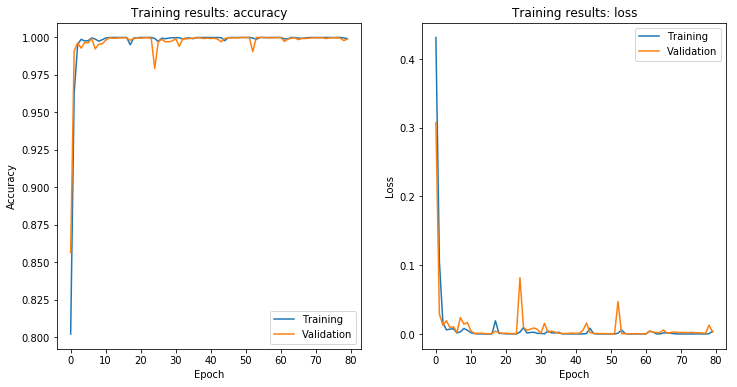

In [18]:
fig, ax =plt.subplots(1,2, figsize=(12,6))
ax[0].plot(predictor_augmented.history['accuracy']    , label='Training'  )
ax[0].plot(predictor_augmented.history['val_accuracy'], label='Validation')
ax[1].plot(predictor_augmented.history['loss']        , label='Training'  )
ax[1].plot(predictor_augmented.history['val_loss']    , label='Validation')

ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Training results: accuracy")
ax[0].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].set_title("Training results: loss")
ax[1].legend()

score = model_augmented.evaluate(X_test_augmented, Y_test_augmented, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

**What we can see is that there isn't a significant improvement through this kind of data augmentation. In fact, the plots show the same trend as before, namely the validation loss starts to increase after a certain amount of epochs and the accuracy becomes worse.**

# 2. - Grid search for hyperparameters tuning <a class="anchor" id="Ex2.2."></a>
* [Index](#Ex2.i)

In the following cells we will show only one of the many grid search we implemented to reduce the execution time of the notebook. If desidered, the grid search will be performed in the appendix section if one of the following flag is set to true.

For the model we will then use the best model we obtained with the various searches.
In the appendix section for some of the cells there are as comment the result of some of the grid searches we perfomed while tuning the model

In [19]:
TUNE_BATCH_EPOCHS_OPT = False
TUNE_OPTIMIZER        = False
TUNE_LOSS             = False
TUNE_DROPOUT_CONSTR   = False
TUNE_REGULARIZATION   = False
TUNE_ACTIVATION       = False

In [20]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.constraints import max_norm
import tensorflow.keras.layers

In [21]:
def create_model(optimizer='adam', loss='binary_crossentropy',metrics='accuracy' ):
    model = Sequential ()
    model.add(Dense(LD, input_shape=(LD,), activation='relu'))
    model.add(Dense(max(10, int(LD/2)), activation='relu'))
    model.add(Dense(max(6, int(LD/4)), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])
    return model

In this cell we show the grid search for batch size and number of epochs, the code also allows to search for the best optimizer if desired.

In [22]:
batch_size = [30,  40, 50, 60]
epochs = [30, 35, 40, 45]
optimizer = [ 'Nadam']
#optimizer = ['SGD', 'RMSprop', 'Adamax', 'Nadam']

model_grid = KerasClassifier(build_fn=create_model,  verbose=0)
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, n_jobs=1,  cv=3, verbose=2)
grid_result = grid.fit(X_train_augmented, Y_train_augmented)
# tune on lower data set to prevent memory leak
#grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_epochs=grid_result.best_params_['epochs']
best_batch_size=grid_result.best_params_['batch_size']
best_opt=grid_result.best_params_['optimizer']

#1st run
#batch_size = [10, 30, 50]
#epochs = [10, 20, 30, 40]
#optimizer = ['SGD', 'RMSprop', 'Adamax', 'Nadam']
#best 50 batch, 30 epoch, adam

#2nd run 
#batch_size = [10, 30, 50, 70]
#epochs = [ 20, 30, 40]
#optimizer = [ 'RMSprop', 'Adamax', 'Nadam']
#Best: 0.830833 using {'batch_size': 10, 'epochs': 40, 'optimizer': 'Nadam'}

#3rd run 
#batch_size = [10, 30, 50, 70]
#epochs = [ 30, 40, 50]
#optimizer = [ 'RMSprop', 'Nadam']
#Best: 0.831250 using {'batch_size': 30, 'epochs': 40, 'optimizer': 'Nadam'}

#4th run
#batch_size = [10, 30, 40, 50]
#epochs = [ 35, 40, 45, 100]
#optimizer = [ 'RMSprop', 'Nadam']
#Best: 0.840000 using {'batch_size': 50, 'epochs': 35, 'optimizer': 'Nadam'}

#5th tun
#batch_size = [10,  40, 50, 60, 100]
#epochs = [30, 35, 40, 45]
#optimizer = [ 'Nadam']
#Best: 0.838750 using {'batch_size': 50, 'epochs': 35, 'optimizer': 'Nadam'}

#6th run -> augmented data set
#batch_size = [10,  40, 50, 60, 100]
#epochs = [30, 35, 40, 45]
#optimizer = [ 'Nadam']

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 25.3min finished


Best: 0.898869 using {'batch_size': 40, 'epochs': 30, 'optimizer': 'Nadam'}
0.893571 (0.006874) with: {'batch_size': 30, 'epochs': 30, 'optimizer': 'Nadam'}
0.888690 (0.006637) with: {'batch_size': 30, 'epochs': 35, 'optimizer': 'Nadam'}
0.886786 (0.005500) with: {'batch_size': 30, 'epochs': 40, 'optimizer': 'Nadam'}
0.892857 (0.002067) with: {'batch_size': 30, 'epochs': 45, 'optimizer': 'Nadam'}
0.898869 (0.002343) with: {'batch_size': 40, 'epochs': 30, 'optimizer': 'Nadam'}
0.893214 (0.004009) with: {'batch_size': 40, 'epochs': 35, 'optimizer': 'Nadam'}
0.889881 (0.004801) with: {'batch_size': 40, 'epochs': 40, 'optimizer': 'Nadam'}
0.888631 (0.004267) with: {'batch_size': 40, 'epochs': 45, 'optimizer': 'Nadam'}
0.896905 (0.002415) with: {'batch_size': 50, 'epochs': 30, 'optimizer': 'Nadam'}
0.890595 (0.005803) with: {'batch_size': 50, 'epochs': 35, 'optimizer': 'Nadam'}
0.888810 (0.002501) with: {'batch_size': 50, 'epochs': 40, 'optimizer': 'Nadam'}
0.887738 (0.002194) with: {'batch

Now we define the best value we found for each parameter and create the model with them, after that we can train it on the data.

To see the real utility of the data augmentation we can use this model both on the normal dataset and on the augmented data set.

In [22]:
best_activation_dense= tensorflow.keras.layers.ELU(alpha=0.05)
best_activation_final='sigmoid'
best_weight_constraint=10
best_dropout_rate=0.2 # 0.2
best_learning_rate=0.03 # 0.03
best_beta_1=0.8
best_beta_2=0.95
best_loss='binary_crossentropy'
best_epochs=50
best_batch_size=200 # 200

In [23]:
best_model = Sequential ()
best_model.add(Dense(LD, input_shape=(LD,), activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0003)))
best_model.add(Dense(max(10, int(LD/2)),    activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0003)))
best_model.add(Dense(max(6, int(LD/4)),     activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0003)))
best_model.add(Dropout(best_dropout_rate))
best_model.add(Dense(1, activation=best_activation_final))
best_optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=best_learning_rate, beta_1=best_beta_1, beta_2=best_beta_2)
best_model.compile(loss=best_loss, optimizer=best_optimizer, metrics=['accuracy']) #alredy tuned
print(best_model.summary())

best_model_aug = Sequential ()
best_model_aug.add(Dense(LD, input_shape=(LD,), activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0003)))
best_model_aug.add(Dense(max(10, int(LD/2)),    activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0003)))
best_model_aug.add(Dense(max(6, int(LD/4)),     activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0003)))
best_model_aug.add(Dropout(best_dropout_rate))
best_model_aug.add(Dense(1, activation=best_activation_final))
best_optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=best_learning_rate, beta_1=best_beta_1, beta_2=best_beta_2)
best_model_aug.compile(loss=best_loss, optimizer=best_optimizer, metrics=['accuracy']) #alredy tuned

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 63)                4032      
_________________________________________________________________
dense_9 (Dense)              (None, 31)                1984      
_________________________________________________________________
dense_10 (Dense)             (None, 15)                480       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 6,512
Trainable params: 6,512
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
best_predictor=best_model.fit(X_train, Y_train, epochs=best_epochs, batch_size=best_batch_size, 
                              validation_data=(X_test,Y_test), verbose=0)


best_predictor_aug=best_model_aug.fit(X_train_augmented, Y_train_augmented, epochs=best_epochs, batch_size=best_batch_size, 
                               validation_data=(X_test_augmented,Y_test_augmented), verbose=0)

600/600 [==============================] - 0s 164us/sample - loss: 0.2609 - accuracy: 0.9283


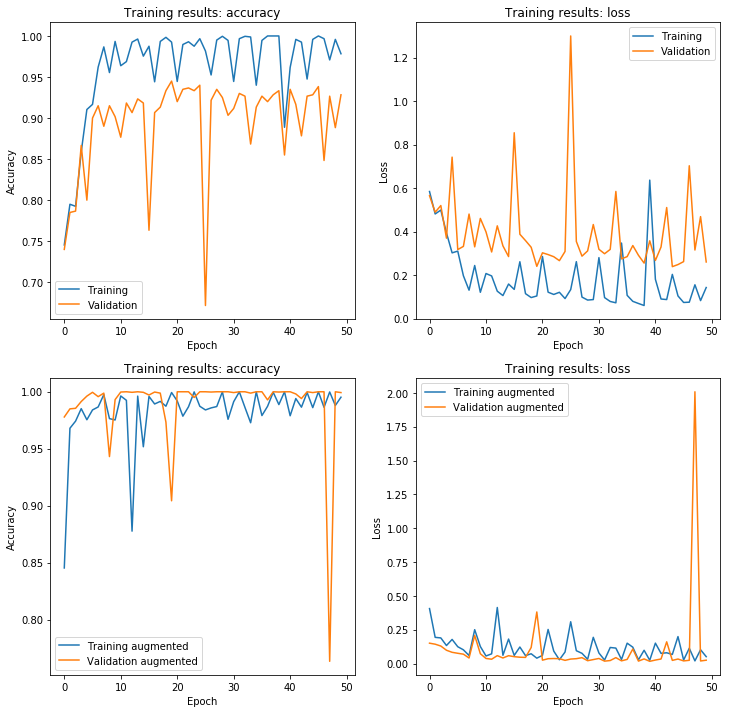


On normal data set
Test loss: 0.26093283474445345
Test accuracy: 0.92833334
On the augmented data set
Test loss: 0.02489051552045913
Test accuracy: 0.9992857


In [25]:
score_aug = best_model_aug.evaluate(X_test_augmented, Y_test_augmented, verbose=1)
score = best_model.evaluate(X_test, Y_test, verbose=1)

fig, ax =plt.subplots(2,2, figsize=(12,12))
ax[0,0].plot(best_predictor.history['accuracy']        , label='Training'  )
ax[0,0].plot(best_predictor.history['val_accuracy']    , label='Validation')
ax[0,1].plot(best_predictor.history['loss']            , label='Training'  )
ax[0,1].plot(best_predictor.history['val_loss']        , label='Validation')
ax[1,0].plot(best_predictor_aug.history['accuracy']    , label='Training augmented'  )
ax[1,0].plot(best_predictor_aug.history['val_accuracy'], label='Validation augmented')
ax[1,1].plot(best_predictor_aug.history['loss']        , label='Training augmented'  )
ax[1,1].plot(best_predictor_aug.history['val_loss']    , label='Validation augmented')

for i in range(2): ax[i,0].set_xlabel("Epoch")
for i in range(2): ax[i,0].set_ylabel("Accuracy")
for i in range(2): ax[i,0].set_title("Training results: accuracy")
for i in range(2): ax[i,0].legend()
for i in range(2): ax[i,1].set_xlabel("Epoch")
for i in range(2): ax[i,1].set_ylabel("Loss")
for i in range(2): ax[i,1].set_title("Training results: loss")
for i in range(2): ax[i,1].legend()

plt.show()



# print performance
print()
print("On normal data set")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("On the augmented data set")
print('Test loss:', score_aug[0])
print('Test accuracy:', score_aug[1])

The results now show that the tuning of the parameters is very important for the model in order to be able to correctly predict the results.

In fact, we can see that the results on non augmented data are still far away from optimal. Even though they may be improved by running the training with different hyperparameters, the size of the dataset should not have such a big impact on the tuning itself.

## 3. - Data rescaling experiments <a class="anchor" id="Ex2.3."></a>
* [Index](#Ex2.i)

In the cell below we will try to see if a rescaling of the data before the fit of the model can lead to a better result.
In particular, we modify the augmented data set and try then use it to train the model just like before.

As we did before, we will compare the result of this operation in the normal and augmented dataset

In [26]:
x=np.concatenate((X_train_augmented, X_test_augmented), axis=0)
X_train_augmented_rescaled = (X_train_augmented - np.mean(x, axis=0)) / np.std(x, axis=0)
X_test_augmented_rescaled = (X_test_augmented - np.mean(x, axis=0)) / np.std(x, axis=0)

x=np.concatenate((X_train, X_test), axis=0)
X_train_rescaled = (X_train - np.mean(x, axis=0)) / np.std(x, axis=0)
X_test_rescaled = (X_test - np.mean(x, axis=0)) / np.std(x, axis=0)
print(X_train_augmented_rescaled[0])

[ 2.91660146 -0.36174054 -0.36258174 -0.3479601  -0.35181797 -0.35463208
 -0.36769076 -0.34572003 -0.34649637 -0.34286481 -0.36174054 -0.36258174
 -0.3479601  -0.35181797 -0.35463208 -0.36769076  2.89251395 -0.34649637
 -0.34286481 -0.36174054 -0.36258174 -0.3479601  -0.35181797 -0.35463208
  2.7196767  -0.34572003 -0.34649637 -0.34286481  2.76441229 -0.36258174
 -0.3479601  -0.35181797 -0.35463208 -0.36769076 -0.34572003 -0.34649637
 -0.34286481 -0.36174054 -0.36258174 -0.3479601  -0.35181797  2.81982387
 -0.36769076 -0.34572003 -0.34649637 -0.34286481 -0.36174054 -0.36258174
 -0.3479601   2.84237894 -0.35463208 -0.36769076 -0.34572003 -0.34649637
 -0.34286481 -0.36174054 -0.36258174 -0.3479601  -0.35181797 -0.35463208
 -0.36769076  2.89251395 -0.34649637]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 63)                4032      
_________________________________________________________________
dense_17 (Dense)             (None, 31)                1984      
_________________________________________________________________
dense_18 (Dense)             (None, 15)                480       
_________________________________________________________________
dropout_4 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 16        
Total params: 6,512
Trainable params: 6,512
Non-trainable params: 0
_________________________________________________________________
None
600/600 [==============================] - 0s 250us/sample - loss: 0.2456 - accuracy: 0.9367


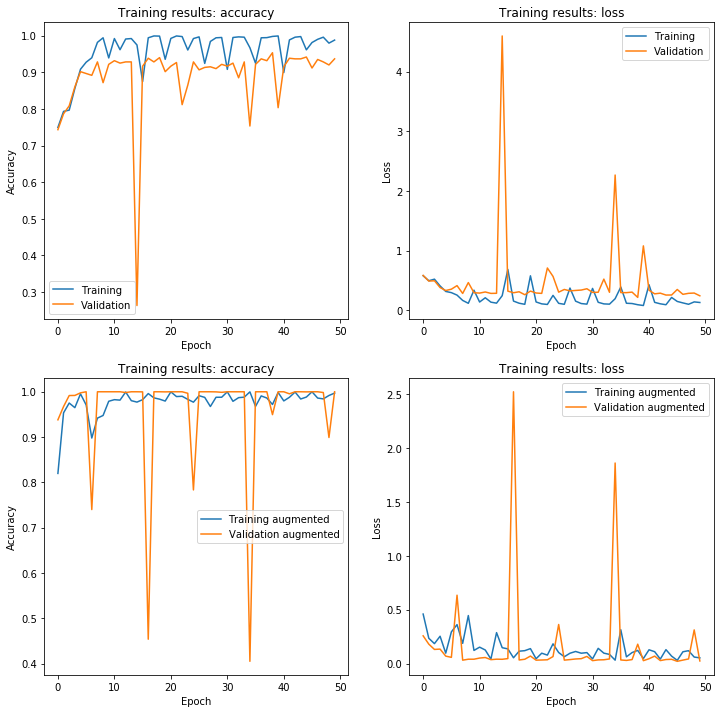


On normal data set
Test loss: 0.24557235499223073
Test accuracy: 0.93666667
On the augmented data set
Test loss: 0.02531272619607903
Test accuracy: 1.0


In [27]:
best_model = Sequential ()
best_model.add(Dense(LD, input_shape=(LD,), activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0005)))
best_model.add(Dense(max(10, int(LD/2)),    activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0005)))
best_model.add(Dense(max(6, int(LD/4)),     activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0005)))
best_model.add(Dropout(best_dropout_rate))
best_model.add(Dense(1, activation=best_activation_final))
best_optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=best_learning_rate, beta_1=best_beta_1, beta_2=best_beta_2)
best_model.compile(loss=best_loss, optimizer=best_optimizer, metrics=['accuracy']) #alredy tuned
print(best_model.summary())

best_model_aug = Sequential ()
best_model_aug.add(Dense(LD, input_shape=(LD,), activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0005)))
best_model_aug.add(Dense(max(10, int(LD/2)),    activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0005)))
best_model_aug.add(Dense(max(6, int(LD/4)),     activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0005)))
best_model_aug.add(Dropout(best_dropout_rate))
best_model_aug.add(Dense(1, activation=best_activation_final))
best_optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=best_learning_rate, beta_1=best_beta_1, beta_2=best_beta_2)
best_model_aug.compile(loss=best_loss, optimizer=best_optimizer, metrics=['accuracy']) #alredy tuned

best_predictor=best_model.fit(X_train, Y_train, epochs=best_epochs, batch_size=best_batch_size, 
                              validation_data=(X_test,Y_test), verbose=0)

best_predictor_aug=best_model_aug.fit(X_train_augmented, Y_train_augmented, epochs=best_epochs, batch_size=best_batch_size, 
                               validation_data=(X_test_augmented,Y_test_augmented), verbose=0)

score_aug = best_model_aug.evaluate(X_test_augmented, Y_test_augmented, verbose=1)
score = best_model.evaluate(X_test, Y_test, verbose=1)

fig, ax =plt.subplots(2,2, figsize=(12,12))
ax[0,0].plot(best_predictor.history['accuracy']        , label='Training'  )
ax[0,0].plot(best_predictor.history['val_accuracy']    , label='Validation')
ax[0,1].plot(best_predictor.history['loss']            , label='Training'  )
ax[0,1].plot(best_predictor.history['val_loss']        , label='Validation')
ax[1,0].plot(best_predictor_aug.history['accuracy']    , label='Training augmented'  )
ax[1,0].plot(best_predictor_aug.history['val_accuracy'], label='Validation augmented')
ax[1,1].plot(best_predictor_aug.history['loss']        , label='Training augmented'  )
ax[1,1].plot(best_predictor_aug.history['val_loss']    , label='Validation augmented')

for i in range(2): ax[i,0].set_xlabel("Epoch")
for i in range(2): ax[i,0].set_ylabel("Accuracy")
for i in range(2): ax[i,0].set_title("Training results: accuracy")
for i in range(2): ax[i,0].legend()
for i in range(2): ax[i,1].set_xlabel("Epoch")
for i in range(2): ax[i,1].set_ylabel("Loss")
for i in range(2): ax[i,1].set_title("Training results: loss")
for i in range(2): ax[i,1].legend()
plt.show()



# print performance
print()
print("On normal data set")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("On the augmented data set")
print('Test loss:', score_aug[0])
print('Test accuracy:', score_aug[1])

We can see that the result is almost the same but there are less oscillation in the loss and accuracy plot.

The normal dataset is still too little to match the result of the augmented data set but we can clearly see that there is an improvement since its accuracy has raised from a 75/80% (which corresponds in practice to a random guess) to an almost 85%.

## 4. - Appendix <a class="anchor" id="Ex2.4."></a>
* [Index](#Ex2.i)

This algos will run if the flag defined above are set to true, this way one can choose which parameter to tune each time

In [29]:
best_activation_dense= tensorflow.keras.layers.ELU(alpha=0.05)
best_activation_final='sigmoid'
best_weight_constraint=10
best_dropout_rate=0.3 # 0.2
best_learning_rate=0.03 # 0.03
best_beta_1=0.9
best_beta_2=0.985
best_loss='binary_crossentropy'
best_epochs=30
best_batch_size=200 # 200

best_model = Sequential ()
best_model.add(Dense(LD, input_shape=(LD,), activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0001)))
best_model.add(Dense(max(10, int(LD/2)),    activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0001)))
best_model.add(Dense(max(6, int(LD/4)),     activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint), kernel_regularizer=l2(0.0001)))
best_model.add(Dropout(best_dropout_rate))
best_model.add(Dense(1, activation=best_activation_final))
best_optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=best_learning_rate, beta_1=best_beta_1, beta_2=best_beta_2)
best_model.compile(loss=best_loss, optimizer=best_optimizer, metrics=['accuracy']) #alredy tuned
print(best_model.summary())

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 63)                4032      
_________________________________________________________________
dense_221 (Dense)            (None, 31)                1984      
_________________________________________________________________
dense_222 (Dense)            (None, 15)                480       
_________________________________________________________________
dropout_55 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_223 (Dense)            (None, 1)                 16        
Total params: 6,512
Trainable params: 6,512
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
if TUNE_BATCH_EPOCHS_OPT==True:
    def create_model_opt(optimizer='adam', loss='binary_crossentropy',metrics='accuracy' ):
        model = Sequential ()
        model.add(Dense(LD, input_shape=(LD,), activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dense(max(10, int(LD/2)),    activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dense(max(6, int(LD/4)),     activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dropout(best_dropout_rate))
        model.add(Dense(1, activation=best_activation_final))
        model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])
        return model
    
    
    batch_size = [30,  40, 50, 60]
    epochs = [30, 35, 40, 45]
    #optimizer = [ 'Nadam']
    #optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    optimizer = ['SGD', 'RMSprop', 'Adamax', 'Nadam']
    
    model_grid = KerasClassifier(build_fn=create_model_opt,  verbose=0)
    param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
    
    grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, n_jobs=1,  cv=3, verbose=5)
    grid_result = grid.fit(X_train_augmented, Y_train_augmented)
    #i tune on lower data set to prevent memory leak
    #grid_result = grid.fit(X_train, Y_train)
    
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

In [31]:
#i know that the model is an Nadam  so i use it's parameters
#the parameters have to be changed in caso the optimizer is different from Nadam
if TUNE_OPTIMIZER==True:
    def create_model_learn_rate(learning_rate=0.002, beta_1=0.9, beta_2=0.999):
        model = Sequential ()
        model.add(Dense(LD, input_shape=(LD,), activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dense(max(10, int(LD/2)),    activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dense(max(6, int(LD/4)),     activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dropout(best_dropout_rate))
        model.add(Dense(1, activation=best_activation_final))
        #optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate, rho=rho)
        optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model
    
    learning_rate = [ 0.2, 0.25, 0.03, 0.035]
    beta_1 =[ 0.75, 0.8, 0.875, 0.9,  0.95]
    beta_2 = [0.985, 0.99, 0.995]
    #rho = [ 0.9, 0.95, 0.99, 0.999]
    #param_grid = dict(learning_rate=learning_rate, rho=rho)
    param_grid = dict(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2)
    
    model_grid = KerasClassifier(build_fn=create_model_learn_rate, epochs=best_epochs, 
                                 batch_size=best_batch_size, verbose=0)
    grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, n_jobs=1, cv=3, verbose=1)
    grid_result = grid.fit(X_train_augmented, Y_train_augmented)
    #grid_result = grid.fit(X_train, Y_train)
    
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

#prima run
#learning_rate = [1e-5, 1e-4, 0.001, 0.01, 0.1, 0.2, 0.3]
#rho = [0.7, 0.8, 0.9, 0.99]
#Best: 0.927679 using {'learning_rate': 0.01, 'rho': 0.99}

#best_learn_rate= grid_result.best_params_['learning_rate']
#best_rho= grid_result.best_params_['rho']
#best_beta_1 =grid_result.best_params_['beta_1']
#best_beta_2 =grid_result.best_params_['beta_2']
#best_opt=keras.optimizers.Nadam(learning_rate=best_learn_rate, beta_1=best_beta_1, beta_2=best_beta_2)

#1st run augmented set
#learning_rate = [ 1e-4,  0.001,  0.01,  0.1]
#beta_1 =[  0.85, 0.9, 0.95]
#beta_2 = [ 0.99, 0.999]
#Best: 0.932083 using {'beta_1': 0.9, 'beta_2': 0.99, 'learning_rate': 0.1}
#also  0.927679 (0.005683) with: {'beta_1': 0.95, 'beta_2': 0.99, 'learning_rate': 0.1}

#2nd run augmented data
#learning_rate = [  0.05,  0.1, 0.15]
#beta_1 =[   0.9, 0.925, 0.95]
#beta_2 = [0.985, 0.99, 0.995]
#Best: 0.933690 using {'beta_1': 0.95, 'beta_2': 0.985, 'learning_rate': 0.1}
#0.933631 (0.003307) with: {'beta_1': 0.9, 'beta_2': 0.985, 'learning_rate': 0.1}
#0.923929 (0.010656) with: {'beta_1': 0.9, 'beta_2': 0.99, 'learning_rate': 0.05}
#0.928631 (0.006780) with: {'beta_1': 0.9, 'beta_2': 0.99, 'learning_rate': 0.1}
#0.926250 (0.007681) with: {'beta_1': 0.925, 'beta_2': 0.985, 'learning_rate': 0.05}
#0.925536 (0.008270) with: {'beta_1': 0.95, 'beta_2': 0.995, 'learning_rate': 0.05}
#0.923036 (0.006105) with: {'beta_1': 0.925, 'beta_2': 0.995, 'learning_rate': 0.05}

#3rd run augmented data
#learning_rate = [  0.05, 0.075, 0.1]
#beta_1 =[   0.9, 0.925, 0.95]
#beta_2 = [0.985, 0.99]
#Best: 0.932024 using {'beta_1': 0.95, 'beta_2': 0.985, 'learning_rate': 0.1}


In [32]:
#non ho messo le loss categorical perchè hanno bisogno del format categoric (vedi keras)
# is_categorical_crossentropy categorical_hinge categorical_crossentropy
# sparse_categorical_crossentropy
if TUNE_LOSS==True:
    def create_model_loss(loss='binary_crossentropy',metrics='accuracy' ):
        model = Sequential ()
        model.add(Dense(LD, input_shape=(LD,), activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dense(max(10, int(LD/2)),    activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dense(max(6, int(LD/4)),     activation=best_activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dropout(best_dropout_rate))
        model.add(Dense(1, activation=best_activation_final))
        model.compile(loss=loss, optimizer=best_opt, metrics=[metrics])
        return model
    
    #loss = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error',
    #        'mean_squared_logarithmic_error', 'squared_hinge', 'hinge', 'logcosh',
    #       'binary_crossentropy', 'poisson']
    
    loss = ['mean_squared_error', 'binary_crossentropy', 'poisson']
    
    
    param_grid=dict(loss=loss)
    #print(param_grid)
    
    model_grid = KerasClassifier(build_fn=create_model_loss, epochs=best_epochs, 
                                 batch_size=best_batch_size, verbose=0)
    grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, n_jobs=4, cv=3, verbose=1)
    
    grid_result = grid.fit(X_train_augmented, Y_train_augmented)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
#best_loss=grid_result.best_params_['loss']


In [33]:
#now we can tune the activation function and the dropout rate
if TUNE_ACTIVATION==True:
    def create_model_acti(activation_dense='relu', activation_final='sigmoid'):
        model = Sequential ()
        model.add(Dense(LD, input_shape=(LD,), activation=activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dense(max(10, int(LD/2)), activation=activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dense(max(6, int(LD/4)), activation=activation_dense, kernel_constraint=max_norm(best_weight_constraint)))
        model.add(Dropout(best_dropout_rate))
        model.add(Dense(1, activation=activation_final))
        optimizer=best_opt
        model.compile(loss=best_loss, optimizer=optimizer, metrics=['accuracy']) #alredy tuned
        return model
    
    elu01=keras.layers.ELU(alpha=0.01)
    elu02=keras.layers.ELU(alpha=0.05)
    elu03=keras.layers.ELU(alpha=0.1)
    elu04=keras.layers.ELU(alpha=0.15)
    elu05=keras.layers.ELU(alpha=0.2)
    elu06=keras.layers.ELU(alpha=0.25)
    elu07=keras.layers.ELU(alpha=0.3)
    elu08=keras.layers.ELU(alpha=0.35)
    
    
    activation_dense = ['softmax',  'relu',  elu01, elu02, elu03, elu04, elu05,  elu06, elu07, elu08]
    activation_final = [  'sigmoid']
    #activation_dense = [ keras.layers.LeakyReLU(alpha=0.3)]
    #activation_final = [ keras.layers.LeakyReLU(alpha=0.3)]
    #activation_dense = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'LeakyReLU']
    #activation_final = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'LeakyReLU']
    
    
    param_grid = dict(activation_dense=activation_dense,activation_final=activation_final )
    model_grid = KerasClassifier(build_fn=create_model_acti, epochs=best_epochs, 
                                 batch_size=best_batch_size, verbose=0)
    
    
    grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, n_jobs=1, cv=3, verbose=3)
    grid_result = grid.fit(X_train_augmented, Y_train_augmented)
    
    #grid_result = grid.fit(X_train, Y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
#best_activation_dense=grid_result.best_params_['activation_dense']
#best_activation_final=grid_result.best_params_['activation_final']

#relu può essere migliorate solo da ELU (attivazione avanzata)
#volendo si possono fare tutte diverse

#1st run augmented data
#activation_dense = ['softmax', 'softplus', 'relu',  'sigmoid', 'hard_sigmoid',  keras.layers.ELU(alpha=0.3)]
#activation_final = ['softmax', 'softplus', 'relu',  'sigmoid', 'hard_sigmoid',  keras.layers.ELU(alpha=0.3)]
#Best: 0.926905 using {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa708bfb00>, 'activation_final': 'sigmoid'}
#0.242917 (0.005106) with: {'activation_dense': 'softmax', 'activation_final': 'softmax'}
#0.912619 (0.002674) with: {'activation_dense': 'softmax', 'activation_final': 'softplus'}
#0.906250 (0.005202) with: {'activation_dense': 'softmax', 'activation_final': 'relu'}
#0.913036 (0.004218) with: {'activation_dense': 'softmax', 'activation_final': 'sigmoid'}
#0.902440 (0.001980) with: {'activation_dense': 'softmax', 'activation_final': 'hard_sigmoid'}
#0.853869 (0.072946) with: {'activation_dense': 'softmax', 'activation_final': <keras.layers.advanced_activations.ELU object at 0x7efa708bfc18>}
#0.242917 (0.005106) with: {'activation_dense': 'softplus', 'activation_final': 'softmax'}
#0.502679 (0.355458) with: {'activation_dense': 'softplus', 'activation_final': 'softplus'}
#0.757083 (0.005106) with: {'activation_dense': 'softplus', 'activation_final': 'relu'}
#0.908452 (0.003073) with: {'activation_dense': 'softplus', 'activation_final': 'sigmoid'}
#0.589940 (0.240891) with: {'activation_dense': 'softplus', 'activation_final': 'hard_sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': 'softplus', 'activation_final': <keras.layers.advanced_activations.ELU object at 0x7efa708bfc18>}
#0.242917 (0.005106) with: {'activation_dense': 'relu', 'activation_final': 'softmax'}
#0.715595 (0.024971) with: {'activation_dense': 'relu', 'activation_final': 'softplus'}
#0.757083 (0.005106) with: {'activation_dense': 'relu', 'activation_final': 'relu'}
#0.918690 (0.013066) with: {'activation_dense': 'relu', 'activation_final': 'sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': 'relu', 'activation_final': 'hard_sigmoid'}
#0.504643 (0.356873) with: {'activation_dense': 'relu', 'activation_final': <keras.layers.advanced_activations.ELU object at 0x7efa708bfc18>}
#0.242917 (0.005106) with: {'activation_dense': 'sigmoid', 'activation_final': 'softmax'}
#0.803988 (0.070720) with: {'activation_dense': 'sigmoid', 'activation_final': 'softplus'}
#0.757083 (0.005106) with: {'activation_dense': 'sigmoid', 'activation_final': 'relu'}
#0.805774 (0.073244) with: {'activation_dense': 'sigmoid', 'activation_final': 'sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': 'sigmoid', 'activation_final': 'hard_sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': 'sigmoid', 'activation_final': <keras.layers.advanced_activations.ELU object at 0x7efa708bfc18>}
#0.242917 (0.005106) with: {'activation_dense': 'hard_sigmoid', 'activation_final': 'softmax'}
#0.757083 (0.005106) with: {'activation_dense': 'hard_sigmoid', 'activation_final': 'softplus'}
#0.757083 (0.005106) with: {'activation_dense': 'hard_sigmoid', 'activation_final': 'relu'}
#0.757083 (0.005106) with: {'activation_dense': 'hard_sigmoid', 'activation_final': 'sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': 'hard_sigmoid', 'activation_final': 'hard_sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': 'hard_sigmoid', 'activation_final': <keras.layers.advanced_activations.ELU object at 0x7efa708bfc18>}
#0.242917 (0.005106) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa708bfb00>, 'activation_final': 'softmax'}
#0.714940 (0.025297) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa708bfb00>, 'activation_final': 'softplus'}
#0.502679 (0.355458) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa708bfb00>, 'activation_final': 'relu'}
#0.926905 (0.002074) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa708bfb00>, 'activation_final': 'sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa708bfb00>, 'activation_final': 'hard_sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa708bfb00>, 'activation_final': <keras.layers.advanced_activations.ELU object at 0x7efa708bfc18>}




##2nd run augmented data
#
#elu01=keras.layers.ELU(alpha=0.1)
#elu02=keras.layers.ELU(alpha=0.2)
#elu03=keras.layers.ELU(alpha=0.3)
#elu04=keras.layers.ELU(alpha=0.4)
#elu05=keras.layers.ELU(alpha=0.5)
#
#activation_dense = ['softmax',  'relu',  elu01, elu02, elu03, elu04, elu05]
#activation_final = [  'sigmoid', 'hard_sigmoid']
#Best: 0.932619 using {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5496de10>, 'activation_final': 'sigmoid'}
#0.913393 (0.001624) with: {'activation_dense': 'softmax', 'activation_final': 'sigmoid'}
#0.906190 (0.004716) with: {'activation_dense': 'softmax', 'activation_final': 'hard_sigmoid'}
#0.870833 (0.084949) with: {'activation_dense': 'relu', 'activation_final': 'sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': 'relu', 'activation_final': 'hard_sigmoid'}
#0.932619 (0.003080) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5496de10>, 'activation_final': 'sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5496de10>, 'activation_final': 'hard_sigmoid'}
#0.869524 (0.075554) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5496de80>, 'activation_final': 'sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5496de80>, 'activation_final': 'hard_sigmoid'}
#0.908452 (0.011289) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5496df60>, 'activation_final': 'sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5496df60>, 'activation_final': 'hard_sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5496dfd0>, 'activation_final': 'sigmoid'}
#0.757083 (0.005106) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5496dfd0>, 'activation_final': 'hard_sigmoid'}
#0.808929 (0.073666) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa54977080>, 'activation_final': 'sigmoid'}
#0.589940 (0.240891) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa54977080>, 'activation_final': 'hard_sigmoid'}

#3rd run augmented data
#elu01=keras.layers.ELU(alpha=0.01)
#elu02=keras.layers.ELU(alpha=0.05)
#elu03=keras.layers.ELU(alpha=0.1)
#elu04=keras.layers.ELU(alpha=0.15)
#elu05=keras.layers.ELU(alpha=0.2)
#elu06=keras.layers.ELU(alpha=0.25)
#elu07=keras.layers.ELU(alpha=0.3)
#elu08=keras.layers.ELU(alpha=0.35)
#
#
#activation_dense = ['softmax',  'relu',  elu01, elu02, elu03, elu04, elu05,  elu06, elu07, elu08]
#activation_final = [  'sigmoid']
#
#Best: 0.932976 using {'activation_dense': 'relu', 'activation_final': 'sigmoid'}
#0.909048 (0.008295) with: {'activation_dense': 'softmax', 'activation_final': 'sigmoid'}
#0.932976 (0.001323) with: {'activation_dense': 'relu', 'activation_final': 'sigmoid'}
#0.884702 (0.062841) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5069ab38>, 'activation_final': 'sigmoid'}
#0.930536 (0.003013) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5069aba8>, 'activation_final': 'sigmoid'}
#0.873869 (0.078263) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5069ac88>, 'activation_final': 'sigmoid'}
#0.927143 (0.005463) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5069acf8>, 'activation_final': 'sigmoid'}
#0.908512 (0.030741) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5069ad68>, 'activation_final': 'sigmoid'}
#0.925119 (0.005278) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5069add8>, 'activation_final': 'sigmoid'}
#0.809405 (0.078375) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5069ae48>, 'activation_final': 'sigmoid'}
#0.929286 (0.000772) with: {'activation_dense': <keras.layers.advanced_activations.ELU object at 0x7efa5069aeb8>, 'activation_final': 'sigmoid'}

#TOP3
# 0.932976 relu sigmoid (però oscilla prima)
# 0.932976 ELU(0.05) sigmoid
# 0.92 Elu(0.15, 0.25, 0.35)

In [34]:
from tensorflow.keras.constraints import max_norm
if TUNE_DROPOUT_CONSTR==True:
    def create_model_drop_constr(dropout_rate=0.2, weight_constraint=2):
        model = Sequential ()
        model.add(Dense(LD, input_shape=(LD,), activation=best_activation_dense, kernel_constraint=max_norm(weight_constraint)))
        model.add(Dense(max(10, int(LD/2)), activation=best_activation_dense, kernel_constraint=max_norm(weight_constraint)))
        model.add(Dense(max(6, int(LD/4)), activation=best_activation_dense, kernel_constraint=max_norm(weight_constraint)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1, activation=best_activation_final))
        optimizer=best_opt
        model.compile(loss=best_loss, optimizer=optimizer, metrics=['accuracy']) #alredy tuned
        return model
    
    weight_constraint = [1, 2, 3, 4, 5, 6]
    dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
    
    model_grid = KerasClassifier(build_fn=create_model_drop_constr, epochs=best_epochs, 
                                 batch_size=best_batch_size, verbose=0)
    
    
    grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, n_jobs=1, cv=3, verbose=3)
    grid_result = grid.fit(X_train_augmented, Y_train_augmented)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

#best_weight_constraint=grid_result.best_params_['weight_constraint']
#best_dropout_rate=grid_result.best_params_['dropout_rate']

#first run
#Best: 0.931667 using {'dropout_rate': 0.1, 'weight_constraint': 5}
#weight_constraint = [1, 2, 3, 4, 5, 6]
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]